# Linear Regression 

- **Linear Regression Always Gives the Result Based on the Best Fit Line**



**Bias and Variance**

- Bias means Error of Training Data 
- Variance Means Error of the Testing Data


**Linear Regression is a high bias and low variance Model**
- It always give high level of accuracy of test accuracy



**Degree of Polynomial (df)** :

- if df is 1 it means its a stright line (helps for linear points 
- if df is 2 it means its a curve line (helps for some non linear points)



**Under and Over Fitting**

- Underfitting means error of traing data is high (both training and testing data accuracy is low) -> High Bias and High Variance 

- OverFitting means error of traing data is very low but test data error is very high (Traing Accuracy high and Testing Accuracy is Low) --> Low Bias and High Variance

- **We always Select Low Bias and Low Variance Model**



**We have two ways to build linear regression model**
1. Sklearn 
2. OLS from statsmodel -- > It just give statistical approach for feature selection



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
from pandas_profiling import ProfileReport

In [2]:
 pd.__version__

'1.3.2'

## import Datset 

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


So here the Data is based on these three add how was our sales

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Here we see we spend more amount on Tv more than radio & newspaper

In [5]:
df.corr()
## Correlation

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [6]:
pf = ProfileReport(df)  ## it gives some statistics

In [7]:
pf.to_widgets() ## using widgets it gives some good UI

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\karthik\anaconda3\envs\ineuron\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu").copy()
  cmap.set_bad(cmap_bad)


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

**Now we see TV is highly correlated with Sales ; Radio is Highly Correlated with Sales ; but newspaper not highly correlated with Sales**

There is No MultiCollinerity

**Why we dont uswe multicollinerinity Feature ?**
- Becoz machine always try to learn indepedent to dependent feature not dependent to dependent feature becozz it cause bias

In [8]:
df.skew() ## if our value is between 0 to 1 it is Gaussian Distribution

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

## Difference between -ve & +ve Correlation ?

Ex : 
-     1. if in Winter Season Sales of IceCream is goes down 
          ; This is  **Negative Correlation**
-    2. if in Winter Season Sales of Umberala is goes up 
           ; This is  **Positive Correlation**
-    3. if we see our orginal data TV and Radio 
          ; This is  **No Correlation**
    
    

In [9]:
## Save the PandasReport 
pf.to_file("report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Build Our Model

In [10]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## First we Build a Model Tv Vs Sales

In [11]:
x = df[['TV']]
y = df.sales

So Now our Equation 
**Sales = m*TV +c**

### Build a Model

In [12]:
#conda install -c conda-forge scikit-learn 

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  ## Create a object for linearRegression

In [14]:
model.fit(x,y)  ## Train the Model , now we find m and c

LinearRegression()

In [15]:
model.intercept_  ## our c value 

7.032593549127693

In [16]:
model.coef_   ## our m value

array([0.04753664])

In [17]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [18]:
17.2*0.04753664+7.032593549127695

7.8502237571276945

In [19]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

## Predict Some Random Values

In [20]:
model.predict([[50]])  ## if we spend TV for 50 our Sales become 9.4
## Sklearn predict always want 2d array so we give 2d array

array([9.40942557])

In [21]:
## if we want a list of item to predict
l = [4,5,7,10,55,8,55]

for i in l:
    print(model.predict([[i]]))

[7.22274011]
[7.27027675]
[7.36535003]
[7.50795995]
[9.64710877]
[7.41288667]
[9.64710877]


## Save the Model in Pickle File

In [22]:
file = "one_linear_reg.sav"  ##sav is pickle(bytecode) format

#pickle.dump(model , open(file , 'wb'))  ## it just store y=mx+c

## Load a Pickle file to Predict the value

In [23]:
saved_model = pickle.load(open('one_linear_reg.sav','rb'))

In [24]:
## predict using pickle file
saved_model.predict([[5]])

array([7.27027675])

## Check the Accuracy

In [25]:
## Score of the model
model.score(x,y)  ##it gives R2 value

0.611875050850071

In [26]:
saved_model.score(x,y)

0.611875050850071

## Visualize the Linear Regression using PairPlot

In [27]:
import seaborn as sns

C:\Users\karthik\anaconda3\envs\ineuron\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


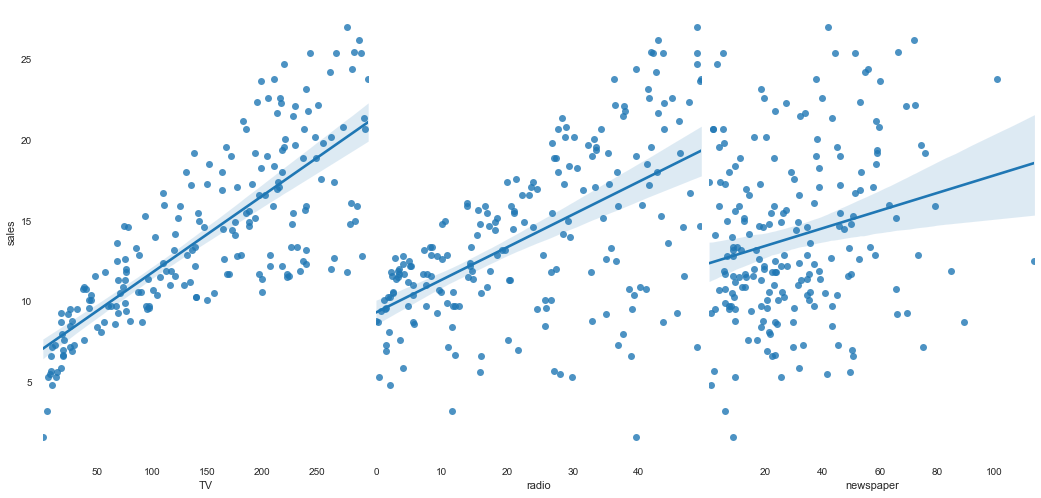

In [28]:
sns.pairplot(df, x_vars= ['TV','radio' , 'newspaper'], y_vars= 'sales' , size = 7 , aspect=0.7 , kind = 'reg')

## Multi Linear Regression
Multi LinearRegression means it gives more Independent and one output data 

**In Single Linear Regression We use only Tv and sales ; but now in multi linear regression we use TV,Radio and newspaper that is called multi linear regression**

In [29]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
## Seperate x and y 
data_x = df[["TV" , "radio" , "newspaper"]]
data_x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [31]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

**So now our Model belike**
- y = mx1+mx2+mx3+c

In [32]:
model

LinearRegression()

In [33]:
model.fit(data_x , y)

LinearRegression()

In [34]:
model.coef_   ## our m1 , m2 and m3 value

array([ 0.04576465,  0.18853002, -0.00103749])

In [35]:
model.intercept_   ## our c value

2.9388893694594067

In [36]:
model.predict([[40,30,50]])

array([10.37350104])

In [37]:
## To find the Confidence we use r2
model.score(data_x , y)   ## our accuracy 89

0.8972106381789522

**Now we see we use TV we get 62 accuracy now we use 3 variable we get 89**

## Now we use only Newspaper and radio what will we the score

In [38]:
data_x = df[["TV" , "radio" ]]
print(data_x.head()) 
print(y[:5])

      TV  radio
0  230.1   37.8
1   44.5   39.3
2   17.2   45.9
3  151.5   41.3
4  180.8   10.8
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [39]:
model.fit(data_x , y)

LinearRegression()

In [40]:
model.score(data_x , y)  ## 89 is the accuracy

0.8971942610828956

In [41]:
data_x = df[["radio" , "newspaper"]]
data_x.head()

,radio,newspaper
0,37.8,69.2
1,39.3,45.1
2,45.9,69.3
3,41.3,58.5
4,10.8,58.4


In [42]:
model.fit(data_x , y )
model.score(data_x , y)  ## just 33 when we use radio and newspaper

0.33270518395032256

In [43]:
data_x = df[["TV" , "radio"]]
data_x.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [44]:
model.fit(data_x , y )
model.score(data_x , y)  ##  89 when we use TV  and radio that is equal to TV, radio , newspaper

0.8971942610828956

**So now we see Newspaper is not highly correlated with sales**
- so in bussiness conclution we invest more on TV and radio
- we invest 100 rupee on newspaper it gives rs.10
### **This is called as feature Selection**

## Accuracy 
1. Tv --> 61
2. Tv+Radio  --> 89.7
3. Tv+Radio+Newspaper  ---> 89.7

# Feature Selection
 **there are Different ways to select Features**
1. R2(we see before 3 models how  our acccuracy works) ---> but it is not recommend as much 
2.  OLS(Ordinary Least Square Model) 

**It is only for Linear Model**

- but cross validation is best

## StatsModel is just give summary 

## First we use Sales vs Tv 

In [45]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV' , data = df).fit()  ## this "~" symbol is must
lm.summary() ##Sales vs tv

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           1.47e-42
Time:                        21:42:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Now we see our R-Squared value is 0.61 we check the accuracy of Only Tv it gives 61 that was this**
- now we see pvalue of Tv vs Sales is 0.000 so it is significance one 

## Now we add radio , Tv vs  Sales 

In [46]:
lm = smf.ols(formula = 'sales ~ TV+radio' , data = df).fit()  
lm.summary() ##Sales vs tv+Radio

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           4.83e-98
Time:                        21:42:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Now we see our R-Squared value is 0.89 we check the accuracy of Tv+Radio it gives 89 that was this**

## Now we add radio , Tv, Newspaper vs Sales

In [47]:
lm = smf.ols(formula = 'sales ~ TV+radio+newspaper' , data = df).fit()  
lm.summary() ##Sales vs tv+Radio+Newspaper

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        21:42:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Now we see our R-Squared value is 0.89 we check the accuracy of Tv+Radio+Newspaper it gives 89 that was this**
- Now in this our newspaper p value is 0.860 so it not significance 
- here it is beyond 0.5 limit beyond 95% Confidence Unterval
- so 100 - 86 -->14% is our contribute of newspaper of sales(In simple out of 100 14 is contributing)
- but our tv and radio pvalue is 0 so; 100 - 0 -->100% is our contribute of tv and radio of sales(In simple out of 100 ,100 is contributing)


- **Out of 100 atleast 95 will contribute we select that feature  (our pvalue > than 0.05)**
- **so we simply drop the newspaper becozz it contribute only 14**

## Adjusted R-Squared (Adj.R-Squared)
- if we create more no of feature our adj r2 value increase
- sometime r2 is not robust but adjected r2 is  robust not overfitted
- Adj R2 gives reliable value when we add extra data or features compare to R2

## Multi Collinearity

-- Relatiion between feature vs feature
-  when we see Tv and Sales it is multi collineraity becozz one increse another one also increase(It is Releated)
- **So we use only feature and label not feature and feature** 
- if they have relation between feature and feature that is called as multicollinearity ; here we select any one of the feature not two

## How To Check a MultiCollinearity
1. using Graph(visualization) --> Confusion matrix
2. Variance inflation factor (VIF)

In [48]:
data =df.iloc[:,1:]
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:>

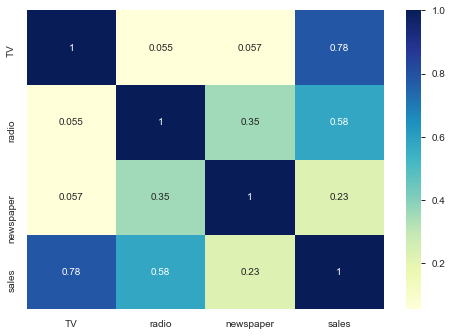

In [49]:
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
## So there is no multicollinearity

It say the relationship between features 
- if we get the value **0.9** or **-0.9** it is highly correlated
- if we get the multicollinearity insted of 2 wer just select any 1 of the feature

In [50]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## VIF (Variance inflation factor )
**Formula: (1/(1-R2))
- If VIF is Greater than 10 that it is multicollinearity

In [51]:
1/(1-0.61)  ## jus example

2.564102564102564

In [52]:
1/(1- 0.91)  ##now we it is multicollinearity

11.111111111111114

## Regularization
Regularization helps to solve over fitting problem in machine learning. Simple model will be a very poor generalization of data. At the same time, complex model may not perform well in test data due to over fitting. We need to choose the right model in between simple and complex model. Regularization helps to choose preferred model complexity, so that model is better at predicting. Regularization is nothing but adding a penalty term to the objective function and control the model complexity using that penalty term. It can be used for many machine learning algorithms.

**Controlling the Error term by best way  is called as Regularization**

## What are the ways to use Regularization :
- 1.L1(Lasso) 
- 2.L2(Ridge)
- 3.ElasticNet

**It is always Good to Build linear regression model with Regularization**

- regularization helps to Build Robust Model

In [1]:
from sklearn.preprocessing import StandardScaler ## Scale the value using zscore(mean 0 and SD 1)
from sklearn.linear_model import Ridge , RidgeCV , Lasso , LassoCV , ElasticNet ,ElasticNetCV ## import regularization cv means cross validation
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv('Admission_Prediction.csv')
data.head()  ## based on the Scores your chances of Admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
profile = ProfileReport(data)  ## pandas Profiling

In [4]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
data.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

<AxesSubplot:>

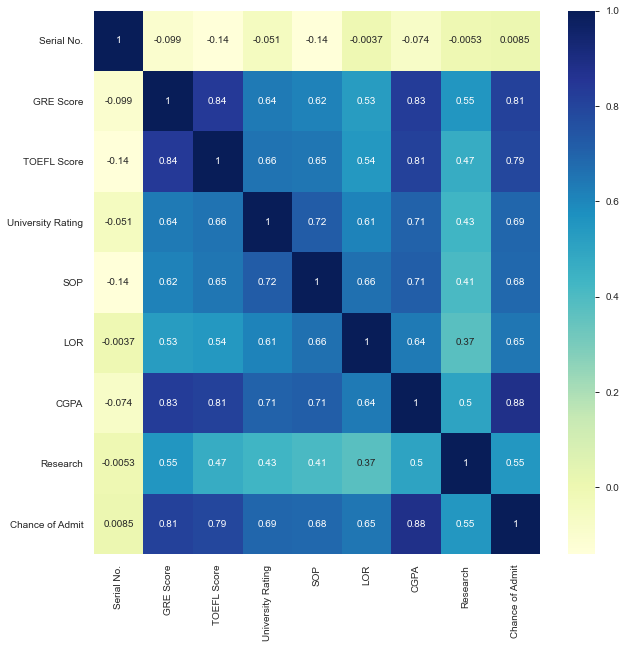

In [67]:
## Correlation
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [8]:
## Save our report
profile.to_file("admission.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Analysis This Data :
1. All the Feature are Numerical
2. There is missing values in GRE Score,	TOEFL Score,	University Rating
3. Some of the Features are Highly correlated , so there is a chance of multicollinearity
4. Searial No are not useful

In [9]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

## Handle the Missing Values

In [5]:
## Handle the GRE Score with mean 
gre_mean = data['GRE Score'].mean()
print(gre_mean)
data['GRE Score'].fillna(gre_mean , inplace=True)

316.55876288659795


In [11]:
data.isnull().sum()  ## Now we handle GRE Score Na values with average but its not good approach

Serial No.            0
GRE Score             0
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
## Handle tofl and university ranking
tofl_score = data['TOEFL Score'].mean()
university_ranking = data['University Rating'].mean()
print(f"Tofl Score : {tofl_score} \nUniversity Ranking : {university_ranking}")
data['University Rating'].fillna(university_ranking , inplace = True)
data['TOEFL Score'].fillna(gre_mean , inplace=True)

Tofl Score : 107.18775510204081 
University Ranking : 3.1216494845360825


In [13]:
data.isnull().sum()  ## Now we handle all Na values with average but its not good approach

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
## Drop the Serial no 
data.drop(['Serial No.'],axis=1,inplace=True)

In [15]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


## Example :
If You Want To Store the New column in new variable we dont specify inplace

In [74]:
lem = pd.read_csv('Admission_Prediction.csv')

In [75]:
#no = lem.drop(['Serial No.'],axis=1)
print(no.head());print();
print(lem.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65         1   
1      324.0        107.0                4.0  4.0  4.5  8.87         1   
2        NaN        104.0                3.0  3.0  3.5  8.00         1   
3      322.0        110.0                3.0  3.5  2.5  8.67         1   
4      314.0        103.0                2.0  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65  

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   
2           3        NaN        104.0                3.0  3.0  3.5  8.00   
3           4      322.0        110.0                3.0  3.5  2.5  8.67   
4           5      314.0        103.0           

**This is just a code example not in project**
- Project Start here after

## Drop The Series

In [16]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [8]:
## Seperate x and y
x = data.drop(['Chance of Admit'],axis = 1)
y = data['Chance of Admit']

In [9]:
print(y[:5]);print()
x.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


## Scale the Value in x 

**Why Scaling is Important ?**
-      Becozz the Range of the value is different from the columns
-      It is not manditory but if we dont scale its difficult for the model to learn so we low down the value using Scaling
-      In Simple our data variance is more our model  tough to learn  

In [10]:
## Create a object for StandardScalar
scalar = StandardScaler()  ## Z Score

In [11]:
## Fit transform our x 
scale_value = scalar.fit_transform(x)
scale_value

array([[ 1.84274116e+00,  2.21352554e-01,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -1.46185938e-01,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -2.46423709e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.88177735e-01,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -2.79836299e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  5.42896033e-02,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [21]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [12]:
df1 = pd.DataFrame(scale_value)
df1.columns = x.columns

In [13]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.842741e+00,0.221353,0.778906,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.146186,0.778906,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.246424,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,-0.045948,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.279836,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152


In [106]:
from pandas_profiling import ProfileReport

In [24]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.842741e+00,0.221353,0.778906,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.146186,0.778906,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.246424,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,-0.045948,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.279836,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152


In [14]:
df1.profile_report()


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,4.384049e-15,1.953993e-16,3.979039e-16,-8.526513e-17,4.263256e-17,3.119283e-15,-7.815970e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.394225e+00,-6.473748e-01,-1.881441e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00
25%,-6.814090e-01,-2.798363e-01,-9.946589e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00
50%,5.124333e-15,-1.461859e-01,-1.078766e-01,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01
75%,6.708143e-01,2.087701e-02,7.789057e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01
max,2.113186e+00,6.855715e+00,1.665688e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01


## Check MultiCollinearity

<AxesSubplot:>

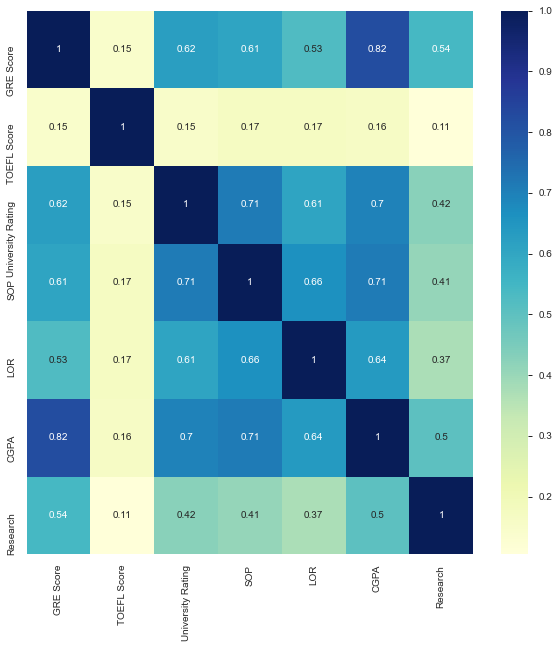

In [32]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

In [26]:
## Using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
scale_value.shape  ## Array Shape when we scale the value 500 row 7 column

(500, 7)

In [27]:
[variance_inflation_factor(scale_value,i)for i in range(scale_value.shape[1])]

[3.306536765546087,
 1.038265005270749,
 2.483613567142079,
 2.7482939299687894,
 2.0433290523753564,
 4.268336860094026,
 1.4585235949855144]

In [28]:
## Columns
for i in range(scale_value.shape[1]):
    print(i)

0
1
2
3
4
5
6


In [29]:
##  Check the feature Importance
vif_df = pd.DataFrame()
vif_df["VIF Score"] = [variance_inflation_factor(scale_value,i)for i in range(scale_value.shape[1])]
vif_df["Feature Names"] =x.columns
vif_df ## everything is lesser than 10 so we dont drop any column 

,VIF Score,Feature Names
0,3.306537,GRE Score
1,1.038265,TOEFL Score
2,2.483614,University Rating
3,2.748294,SOP
4,2.043329,LOR
5,4.268337,CGPA
6,1.458524,Research


**No MultiCollinearity**

## Split the Dataset

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.15, random_state=22)

In [27]:
X_test.shape , X_train.shape

((75, 7), (425, 7))

## using Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [114]:
lr.fit(X_train , y_train)

LinearRegression()

In [115]:
pickle.dump(lr , open("admission_model.pickle","wb")) ###save the model in pickle .sav  and  .pickle are same

In [116]:
print(lr.coef_)   ## M value
print(lr.intercept_)  ##c value

[0.02658802 0.00388469 0.00829262 0.00329948 0.01226611 0.07845115
 0.01419567]
0.7227026926524893


In [40]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


## Now we predict

In [120]:
lr.predict([[337.000000, 118.0, 4.0 , 4.5 , 4.5 , 9.65 , 1]])  ## now we see it predict 13 becozz we use scale values

array([11.01572499])

In [119]:
test1 = scalar.transform([[337.000000, 118.0, 4.0 , 4.5 , 4.5 , 9.65 , 1]])
test1

array([[1.84274116, 0.22135255, 0.77890565, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])

In [121]:
lr.predict([[1.84274116, 0.22135255, 0.77890565, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])  ## now we see it give some approximate result

array([0.94822468])

**So whenever u Scale your train data you give your test data also scaled one**

## Model Accuracy

In [117]:
linear = lr.score(X_test , y_test)
linear

0.8449093861555359

In [122]:
print(f"Our R2 Accuracy is : {lr.score(X_test , y_test)}")  ## testing Accuracy 

Our R2 Accuracy is : 0.8449093861555359


In [123]:
## To create Adjusted R2 we create own function :
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [124]:
print(f"Our Adjusted-R2 Accuracy is : {adj_r2(X_test , y_test)}")  ## Accutual Accuracy

Our Adjusted-R2 Accuracy is : 0.8287058891867113


**Now we see we change the Random State our Accuracy also Change**

## Regularization


### LassoCV 
- LassoCV is an alpha value with m as beta

**cv**
- cv means Cross Validation 
- it helps to find the best possible parameter by random experiment
- now we add cv is 50 it takes 40 as training 10 as testing with 200000000 iteration 
- in every algorithm we use cross validation to find best parameter

In [125]:
lassocv = LassoCV(alphas=None , cv=50 , max_iter=2000000 , normalize=True )
lassocv

LassoCV(cv=50, max_iter=2000000, normalize=True)

In [126]:
lassocv.fit(X_train , y_train)

LassoCV(cv=50, max_iter=2000000, normalize=True)

In [127]:
lassocv.alpha_     ##alpha value

5.968533167745395e-06

### now we use Lasso

In [128]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train , y_train)

Lasso(alpha=5.968533167745395e-06)

In [129]:
lasso.score(X_test , y_test) ## now our accuracy is around 84
## this is our lasso model 

0.8449136016423231

In [130]:
adj_r2(X_test , y_test)

0.8287058891867113

In [131]:
lassoscore = lasso.score(X_test , y_test)
lassoscore

0.8449136016423231

## RidgeCV
- Ridge is an beta square

In [132]:
alpha = np.random.uniform(0 , 10 ,50)

In [133]:
ridgecv = RidgeCV( alphas=alpha , cv = 10 , normalize=True)  ## we give alpha value atleast 
ridgecv

RidgeCV(alphas=array([5.39912050e+00, 3.84626370e+00, 4.44275348e+00, 5.93386727e+00,
       5.46049245e+00, 2.04866059e+00, 3.38831946e-01, 1.36705538e+00,
       6.65269628e+00, 3.59441017e+00, 9.48270766e+00, 8.80151196e+00,
       7.91266709e+00, 9.08961174e+00, 6.34945297e+00, 9.53540014e+00,
       4.62555288e+00, 4.00522185e+00, 7.70745409e+00, 5.35062686e+00,
       2.81447893e+00, 9.82306397e+0...
       8.71603709e+00, 8.09034120e+00, 8.54924304e+00, 5.23916893e+00,
       3.15269209e-01, 8.99461864e+00, 2.39339145e-01, 8.91522928e+00,
       8.14896268e+00, 2.31784143e+00, 3.19866440e+00, 4.23827951e+00,
       6.56589327e+00, 5.25315471e+00, 5.07830510e+00, 5.18191117e+00,
       2.99600807e+00, 1.46697956e+00, 2.05962483e+00, 5.87824061e+00,
       2.53850139e+00, 8.08904364e+00]),
        cv=10, normalize=True)

In [134]:
ridgecv.fit(X_train , y_train)

RidgeCV(alphas=array([5.39912050e+00, 3.84626370e+00, 4.44275348e+00, 5.93386727e+00,
       5.46049245e+00, 2.04866059e+00, 3.38831946e-01, 1.36705538e+00,
       6.65269628e+00, 3.59441017e+00, 9.48270766e+00, 8.80151196e+00,
       7.91266709e+00, 9.08961174e+00, 6.34945297e+00, 9.53540014e+00,
       4.62555288e+00, 4.00522185e+00, 7.70745409e+00, 5.35062686e+00,
       2.81447893e+00, 9.82306397e+0...
       8.71603709e+00, 8.09034120e+00, 8.54924304e+00, 5.23916893e+00,
       3.15269209e-01, 8.99461864e+00, 2.39339145e-01, 8.91522928e+00,
       8.14896268e+00, 2.31784143e+00, 3.19866440e+00, 4.23827951e+00,
       6.56589327e+00, 5.25315471e+00, 5.07830510e+00, 5.18191117e+00,
       2.99600807e+00, 1.46697956e+00, 2.05962483e+00, 5.87824061e+00,
       2.53850139e+00, 8.08904364e+00]),
        cv=10, normalize=True)

In [135]:
ridgecv.alpha_

0.003526361736660988

### Ridge

In [136]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train , y_train)

Ridge(alpha=0.003526361736660988)

In [137]:
ridge_score = ridge.score(X_test , y_test)
ridge_score

0.8449093457195616

## ElasticNetCV

In [138]:
elastic = ElasticNetCV(alphas=None , cv = 10 , normalize=True)
elastic

ElasticNetCV(cv=10, normalize=True)

In [139]:
elastic.fit(X_train , y_train)

ElasticNetCV(cv=10, normalize=True)

In [140]:
elastic.alpha_ , elastic.l1_ratio  ## these two parameter required

(6.370453273547246e-05, 0.5)

## Elastic

In [141]:
elas = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio)
elas

ElasticNet(alpha=6.370453273547246e-05)

In [142]:
elas.fit(X_train , y_train)

ElasticNet(alpha=6.370453273547246e-05)

In [143]:
elastic_score = elas.score(X_test , y_test)
elastic_score

0.8449038144030667

**Now we see all the model gives approx same accuracy , so our model is stable**

## Maximum Accuracy

In [144]:
scores = {
    "LinearRegression" : linear,
    "Lassoregression" : lassoscore ,
    "Ridgeregression" : ridge_score ,
    "ElasticRegression" : elastic_score
}
scores

{'LinearRegression': 0.8449093861555359,
 'Lassoregression': 0.8449136016423231,
 'Ridgeregression': 0.8449093457195616,
 'ElasticRegression': 0.8449038144030667}

In [145]:
Keymax = max(zip(scores.values() , scores.keys()))
print(Keymax)

(0.8449136016423231, 'Lassoregression')


## Now we save our Scalar model in pickle for web use

In [153]:
x.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1


In [146]:
pickle.dump(scalar , open("Scalar_Admission.pickle","wb")) 

In [149]:
scale = pickle.load(open('Scalar_Admission.pickle','rb'))

In [156]:
scale.transform([[337.0, 118.0 , 4.0 , 4.5 , 4.5 , 9.65 , 1]])

array([[1.84274116, 0.22135255, 0.77890565, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])